# Week 1 - Normalization and data types

This first week is going to be a warm-up week where we conider different statistical tools data types.

Lets first import the libraries that we are going to need.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import scipy as sp

## Exercise 1: Sample statistics and normalization

Let $X$ and $Y$ be two normal distributions of discrete variables with ($\mu_X=30,\sigma_X=7$) and ($\mu_Y=70,\sigma_Y=10$) that describe the *Age* and the *Weight* of a population. From $X$ and $Y$ sample the *Age* and the *Weight* of $n=500000$ individuals.

In [2]:
import numpy as np
np.random.seed(1)
# TODO: use np.random.normal to initialize X and Y and round() function for discretization of the data
n = 500000
X = np.random.normal(loc=30, scale=7, size=n).round().astype(int)
Y = np.random.normal(loc=70, scale=10, size=n).round().astype(int)

**a)** Find the mean, the median and the mode for $X,Y$. 

In [3]:
import math

def count_dictionary(X):
    """
    Input: certain list of data   
    Output: counts of list elements as a dictionary 
    Example: Input: [0,1,0,2,3,2,2] => Output: {0:2, 1:1, 2:3, 3:1}
    """
    # TODO: the calculation process of counts
    # We need counts also for later when we are computing the empirical PMF
    occ_count = {}
    for x in X:
        if f'{x}' in occ_count:
            occ_count[f'{x}'] = occ_count[f'{x}'] + 1
        else:
            occ_count[f'{x}'] = 1
    return occ_count


def compute_mean(X):
    """
    Input: certain list of data   
    Output: mean of this list   
    """
    # TODO: the calculation process of mean
    # sorted_x = X
    # sorted_x.sort()
    # Mean
    return sum(X) / len(X)


def compute_median(X):
    """
    Input: certain list of data   
    Output: median of this list
    Tip:Note: If the number of data values is odd, returns the exact middle value. 
    If the number of data values is even, returns the average of the two middle values.   
    """
    # TODO: the calculation process of median
    sorted_x = X
    sorted_x.sort()
    mid_idx = int((len(sorted_x) - 1) / 2)
    return (sorted_x[mid_idx] + sorted_x[mid_idx + 1])/2 if len(sorted_x) % 2 == 0 else sorted_x[mid_idx]

def compute_mode(X):
    """
    Input: certain list of data   
    Output: element with highest frequency 
    Hint: You can use function count_dictionary   
    """
    # TODO: the calculation process of mode  
    occ_count = count_dictionary(X)
    max_ctr = -math.inf
    mode = None
    
    # mode = max(occ_count, key=occ_count.get)
    
    for entry in occ_count:
        if max_ctr < occ_count[entry]:
            max_ctr = occ_count[entry]
            mode = int(entry)
    return mode


x_mean = compute_mean(X)
x_median = compute_median(X)
x_mode = compute_mode(X)

print(f"Mean: {x_mean}\nMedian: {x_median}\nMode: {x_mode}\n" )

y_mean = compute_mean(Y)
y_median = compute_median(Y)
y_mode = compute_mode(Y)

print(f"Mean: {y_mean}\nMedian: {y_median}\nMode: {y_mode}" )

Mean: 30.007646
Median: 30.0
Mode: 30

Mean: 70.002704
Median: 70.0
Mode: 70


**b)** Using the sampled data of a) find their:\
i) Probability Mass Function, ii) Expected Value and iii) Variance.  

In [4]:
# In order to make our life a lot easier, we will compute the probability of each element
# Because that will be useful for the next couple of tasks
# NOTE: We can reuse the dictionary from earlier (Task A)


def compute_pmf(X):
    """
    Input: certain list of data   
    Output: pmf as a dictionary 
    Example: Input: [0,1,0,2,3,2,2] => Output: {0:2/7, 1:1/7, 2:3/7, 3:1/7}
    Hint: you can use count_dictionary function from a)
    """
    # TODO: return pmf of X
    pmf = {}
    entity_count = count_dictionary(X)
    for i, (key, value) in enumerate(entity_count.items()):
        pmf[key] = value/n
    return pmf
    



def compute_ev(X):
    """
    Input: certain list of data   
    Output: expected value of X 
    Hint: you can use compute_pmf function 
    """
    pmf = compute_pmf(X)
    expected_value = 0
    for i, (number, prob) in enumerate(pmf.items()):
        expected_value = expected_value + (float(number) * prob)
    return expected_value
    # TODO: return the expected value of X


def compute_variance(X):  
    """
    Input: certain list of data   
    Output: variance of X 
    Hint: you can use compute_pmf and compute_ev functions
    """
    pmf = compute_pmf(X)
    ev = compute_ev(X)
    return sum([((float(value) - ev) ** 2) * prob for value, prob in pmf.items()])
    # TODO: return the variance of X



    
print("\nFor X:")
x_pmf = compute_pmf(X)
x_ev = compute_ev(X)
print(f'Expected Value of X is {x_ev}')
x_variance = compute_variance(X)
print(f'Variance of X is {x_variance}')

print("\nFor Y:")
y_pmf = compute_pmf(Y)
y_ev = compute_ev(Y)
print(f'Expected Value of Y is {y_ev}')
y_variance = compute_variance(Y)
print(f'Variance of Y is {y_variance}')



For X:
Expected Value of X is 30.007646
Variance of X is 49.01916353868399

For Y:
Expected Value of Y is 70.00270400000002
Variance of Y is 99.99015668838403


**c)** Suppose the only information we had is the sampled data $X$ and $Y$ for the *Age* and *Weight* respectively. Plot the distributions of $X$ and $Y$ and consider if the data seem to fit a normal distribution.  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


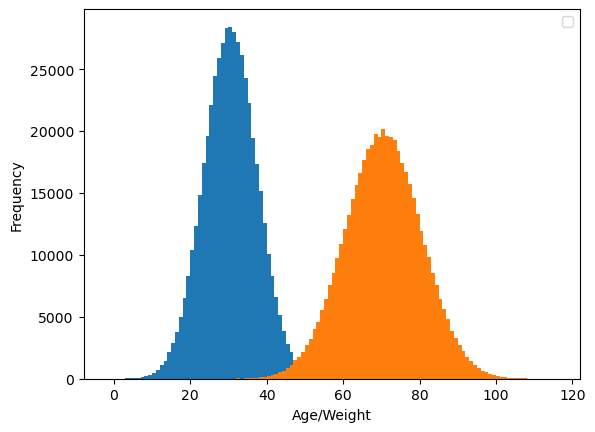

In [11]:
import scipy.stats as stats
# TODO: use plt.hist() and bins = len(np.unique()) in order to visualize the distribution
import matplotlib.pyplot as plt

# Your dictionary
data = count_dictionary(X)

# Prepare data for plotting
keys = [int(k) for k in data.keys()]
values = [v for v in data.values()]

data_y = count_dictionary(Y)

# Prepare data for plotting
keys_y = [int(k) for k in data_y.keys()]
values_y = [v for v in data_y.values()]

# Create graph
# plt.bar(keys, values)
# plt.hist(keys, weights=values, bins=range(min(keys), max(keys) + 2))
plt.hist(keys, weights=values, bins=len(np.unique(keys)))

plt.hist(keys_y, weights=values_y, bins=len(np.unique(keys_y)))


# Label axes
plt.xlabel('Age/Weight')
plt.ylabel('Frequency')

# Show the plot
plt.legend()
plt.show()


**d)** What is the probability of observing weight of 80 or higher?  

HINT: To calculate the probability we have to use the probability density function of normal distribution for $X$, in range $[80,\infty)$. Calculate the sample PDF and the expected PDF given that the distribution is normal with ($\mu_Y=70,\sigma_Y=10$). How close are these two values?

**Answer**

CDF Formula: $ \frac{1 + \frac{x - \mu}{\sigma \cdot \sqrt(2)}}{2}$

In [18]:
 # TODO: find the probability that weight is >80 (PDF), then find the expected PDF of the normal distribution (μ=70,σ=10) and compare the results
def compute_cdf(x, mu, sigma):
    """
    Input: x value, mean (mu), standard deviation (sigma)
    Output: cdf at x for a normal distribution with parameters mu and sigma
    """
    return (1 + math.erf((x - mu) / (sigma * math.sqrt(2)))) / 2


n80  = Y[Y>80]

expected_prob = len(n80) / n
prob_neg = 1-compute_cdf(80, 70, 10)

# calc CDF for y1 and y2 and subtract them

print(f'Expected Probability: {expected_prob}')
print(prob_neg)

Expected Probability: 0.14708
0.15865525393145707


**e)** Find the 2-dimensional mean $\hat \mu$ and the covariance matrix $\widehat \Sigma$ for these two variables.  

$\$

In [19]:
# TODO: Compute 2-Dimensional mean is the vector (E[X], E[Y])
Z = np.c_[X, Y]
n, d = Z.shape
mu = np.mean(Z, axis=0, keepdims=True)
cov = (Z-mu).T @ (Z-mu)/n
# @ = Matrix
# .T = Transpose

# TODO: The diagonal of the Covariance matrix must equal the initial covariance values of X and Y. Check your results.
print("Mean:\n", mu)
print("Cov: \n", cov)

Mean:
 [[30.007646 70.002704]]
Cov: 
 [[49.01916354 69.92121733]
 [69.92121733 99.99015669]]


**f)** Normalize the data with _range normalization_ to the range $[0, 1]$  

**range normalization**:

$x_i^{'} = \frac{x_i-\min_i{x_i}}{\max_i{x_i} - \min_i{x_i}}$

In [20]:
# TODO: Compute the range normalization: (x_i - min)/(max - min)
min_z = Z.min(0, keepdims=True)
max_z = Z.max(0, keepdims=True)

Z_normalised = (Z-min_z) / (max_z - min_z)
print(Z_normalised)

[[0.         0.        ]
 [0.03076923 0.        ]
 [0.03076923 0.        ]
 ...
 [0.96923077 1.        ]
 [0.98461538 1.        ]
 [1.         1.        ]]


**g)** Normalize the data with _standard score normalization_ such that is has mean 0 and standard deviation 1.  

**z-score**:

$x_i^{'} = \frac{x_i-\hat{\mu}}{\hat{\sigma}}$

In [ ]:
# TODO: #  Compute the standard score normalization:, x_i = (x_i - mu)/(sigma)
x_ssn = [(x - x_mean)/np.sqrt(x_variance) for x in X]

## Exercise 2: Robustness
Determine whether the following statements are true or false and explain why.
 - Mean is robust against outliers
 - Median is robust against outliers
 - Standard deviation is robust against outliers


**Answer:**

-> False
-> True
-> False

1. **Mean is robust against outliers**: This statement is **False**. The mean, or average, of a dataset is highly sensitive to outliers. An outlier, which is a data point that is significantly different from the other data points, can greatly affect the mean. For example, consider the dataset {1, 2, 3, 4, 100}. The mean of this dataset is 22, which is heavily influenced by the outlier 100.

2. **Median is robust against outliers**: This statement is **True**. The median, which is the middle value in a sorted dataset, is not affected by outliers. This is because it only considers the middle value(s), and not the magnitude of the values. In the previous example, the median is 3, which is not influenced by the outlier 100.

3. **Standard deviation is robust against outliers**: This statement is **False**. The standard deviation, which measures the dispersion of a dataset, is also sensitive to outliers. This is because it squares the deviations from the mean, causing greater weight to be placed on outliers. In the previous example, the standard deviation is significantly larger due to the outlier 100.

## Exercise 3: More on robustness
Provide an informal definition of when a measure is robust. 

**Answer:**

-> If you have extreme values it should not affect it.

## Exercise 4: Independence analysis
Please explain what the idea of independence analysis is using contingency tables; for which kind of data is this particularly relevant? 


**Answer:**

-> Determine if two categorical variables are independent or ig they are in fact related to one another. If two categorical variables are independent, then the value of one variable does not change the probability distribution of the other. If two categorical variables are related, then the distribution of one depends on the level the other. This test measures the differences in the observed conditional distribution of one variable across levels of the other, and compares it to the marginal (overall) distribution.


## Exercise 5: Contingency table and $\chi^2$ statistics
In the table below,  assuming that $X_1$ is discretized into three bins, as follows: $[-2, -0.5]$, $[-0.5, 0.5]$, and $[0.5, 2]$.

![Table 3.11](graphics/3.11.png)

Answer the following questions

**a)** Construct the contingency table between the discretized $X_1$ and $X_2$ attributes, including the row and column counts.<br>
**b)** Construct the expected table between the discretized $X_1$ and $X_2$ attributes.<br>
**c)** Compute the $\chi^2$ statistic between them.<br>
**d)** Determine whether they are dependent or not at the 5% significance level. Use the $\chi^2$ critical values from Table 3.10.

![Table 3.10](graphics/3.10.png)

**Answer:**
**a)**

In [27]:

X_1 = [0.3, -0.3, 0.44, -0.60, 0.40, 1.20, -0.12, -1.60, 1.60, -1.32]
X_2 = ["a", "b", "a", "a", "a", "b", "a", "b", "b", "a"]
# For sanity's sake, use code to bin X_1
# Converting everything to numbers allow us to index in them for easier computation
X_tmp = []
for x in X_1:
    if x >= -2 and x <= -0.5:
        X_tmp.append(0)
    elif x >= -0.5 and x <= 0.5:
            X_tmp.append(1)
    elif x > 0.5:
            X_tmp.append(2)
X_1 = X_tmp

print(f'X_1: {X_1}')
print(f'X_2: {X_2}')

X_2 = [0 if x == "a" else 1 for x in X_2]

print(f'X_2 Updated: {X_2}')

# Our table looks like
## Bins: a b
## bin1
## bin2
## bin3
b1_row = [0, 0]
b2_row = [0, 0]
b3_row = [0, 0]
count_row = [0, 0, 0] # THIS ONE is for column counts
c_table = [b1_row, b2_row, b3_row]
# TODO: Compute contingency table c_table 

# Iterate over the binned data
for i in range(len(X_1)):
    # Increment the count for the corresponding bin and category
    c_table[X_1[i]][X_2[i]] += 1
    count_row[X_1[i]] += 1

print(f"Our table before row counts: {c_table}")   
print(f'Column Count: {count_row}')

X_1: [1, 1, 1, 0, 1, 2, 1, 0, 2, 0]
X_2: ['a', 'b', 'a', 'a', 'a', 'b', 'a', 'b', 'b', 'a']
X_2 Updated: [0, 1, 0, 0, 0, 1, 0, 1, 1, 0]
Our table before row counts: [[2, 1], [4, 1], [0, 2]]
Column Count: [3, 5, 2]



**Answer:**
**b)**

In [25]:
# Now add row counts
# Remember these are reference variables, so modifying these
# will also modify our table

# TODO: Compute expected table
E = [[0, 0] for _ in range(3)]

# Compute the total count
total_count = sum(count_row)

# Compute the column counts
column_counts = [sum(row) for row in zip(*c_table)]

# Compute the expected counts for each cell
for i in range(3):
    for j in range(2):
        E[i][j] = (count_row[i] * column_counts[j]) / total_count

print("Expected Table:")
for row in E:
    print(row)


print(f"The expected table is: {E}")

Expected Table:
[1.8, 1.2]
[3.0, 2.0]
[1.2, 0.8]
The expected table is: [[1.8, 1.2], [3.0, 2.0], [1.2, 0.8]]


**Answer:**
**c)**



In [28]:
# TODO: Compute Chi_squared
Chi_squared = 0
for i in range(3):
    for j in range(2):
        Chi_squared += ((c_table[i][j] - E[i][j])**2)/(E[i][j])
print(f"Chi_squared is: {Chi_squared}")


Chi_squared is: 3.8888888888888884


**Answer:**
**d)**

# Degree of freedom

q = (2-1)*(3-1) = 2

$X^2 \leq 0.05 (\alpha = 5\%)$

$X^2 = $ Chi-Square
->  We accept it since 3.888 < 5.991

## Exercise 6: Working with Metrics

Consider the following situation: 

We know some distances between data points: $d(p_1,p_2)=1$, $d(p_1,p_3)=2$, $d(p_3, p_4)=1$. 
We also know that $d$ is a metric. 

1. What do we know about the remaining distances?
2. Do we need to compute further distances if we want to find the two points that are most similar to $p_1$? 
3. Can $p_4$ be closer to $p_2$ than $p_3$ is to $p_2$?






**Answers:** Use triangle of inequality

 Given that $d$ is a metric, it must satisfy the following properties:

1. Non-negativity: $d(p_i, p_j) \geq 0$ for all $i, j$.
2. Identity of indiscernibles: $d(p_i, p_j) = 0$ if and only if $p_i = p_j$.
3. Symmetry: $d(p_i, p_j) = d(p_j, p_i)$ for all $i, j$.
4. Triangle inequality: $d(p_i, p_j) \leq d(p_i, p_k) + d(p_k, p_j)$ for all $i, j, k$.

Now, let's answer your questions:

1. From the triangle inequality, we can infer that:
    - $d(p_2, p_3) \leq d(p_2, p_1) + d(p_1, p_3) = 1 + 2 = 3$
    - $d(p_1, p_4) \leq d(p_1, p_3) + d(p_3, p_4) = 2 + 1 = 3$
    - $d(p_2, p_4) \leq d(p_2, p_1) + d(p_1, p_4) \leq 1 + 3 = 4$
2. To find the two points that are most similar to $p_1$, we need to find the two points that have the smallest distances to $p_1$. We already know the distances from $p_1$ to $p_2$ and $p_1$ to $p_3$. To complete this task, we need to compute $d(p_1, p_4)$.
3. From the triangle inequality, we have $d(p_4, p_2) \leq d(p_4, p_3) + d(p_3, p_2) = 1 + 3 = 4$. So, $p_4$ can be closer to $p_2$ than $p_3$ is to $p_2$ if $d(p_4, p_2) < d(p_3, p_2)$, but we don't have enough information to determine this. We would need to know the exact value of $d(p_4, p_2)$ to answer this question definitively.

# Optional Exercises

## Exercise 7: Mean absolute deviation 
Define a measure of deviation called _mean absolute deviation_ for a random variable $X$ as follows:

$$
\frac{1}{n} \sum_{i=1}^n |x_i - \mu|
$$

Is this measure robust? Why or why not?

**Answer:**

-> It is not robust. Single outlier can skew the mean absolute deviation.

## Exercise 8: Correlation

Consider the table below. Assume that both the attributes $X$ and $Y$ are numeric, and the
table represents the entire population. And we know that the correlation between $X$
and $Y$ is zero.
1. What can you infer about the values of $Y$? (Find a relationship between $a$, $b$ and $c$)
2. If we know there is a missing row, what can we infer about it?

|$X$ | $Y$ |
|:---:|:---:|
|$1$|$a$|
|$0$|$b$|
|$1$|$c$|
|$0$|$a$|
|$0$|$c$|

**Answer**

    1. E[XY] = E[X] E[Y]
    
E[XY] = (1*a + 0*b ....) / 5 = a+c/5

E[X] = 2/5

E[Y] = 2a + b + 2c / 5

Solve the equation above

2b = a + c


    2.



# Exercise 9: 3-way contingency table

Consider the 3-way contingency table for attributes $X$,$Y$,$Z$ shown in the table below.
Compute the $\chi^2$ metric for the correlation between $Y$ and $Z$. Are they dependent
or independent at the 95% confidence level? See Table 3.10 above for $\chi^2$ values.

![Table 3.9](graphics/3.9.png)

In [ ]:
import scipy.stats.contingency
from scipy.stats import chi2_contingency
# TODO: Compute contingency using chi2_contingency
xy = np.array([[40,25],[40,35]])

# Exercise 10: Mixed data

Consider the "mixed" data given in the table below. Here $X_1$ is a numeric attribute and
$X_2$ is a categorical one. Assume that the domain of $X_2$ is given as $dom(X_2) = \{a, b\}$.
Answer the following questions.

**a)** What is the mean vector for this dataset?  
**b)** What is the covariance matrix?  

![Table 3.11](graphics/3.11.png)



In [ ]:
fine = np.array([[0.3,1,0],[-0.3,0,1],[0.44,1,0],[-0.6,1,0],[0.4,1,0],[1.2,0,1],[-0.12,1,0],[-0.16,0,1],[1.6,0,1],[-1.32,1,0]])
# TODO: compute the mean vector
mu = None
print("mean vector:\n", mu)

In [ ]:
n, d = fine.shape
# TODO: compute the covariance matrix
cov = None

print(f"Cov: {cov}")